# Ejercicio 15

## Enunciado
Crea un programa que:

1. Obtenga los datos acerca del COVID-19 de [esta enlance](https://covid19.isciii.es/resources/serie_historica_acumulados.csv).
2. Cree una gráfica de barras que muestre el número de casos más reciente en cada CCAA.

## Extra
3. Crea la misma gráfica ordenada por número de casos de mayor a menor.
4. Pinta de color rojo aquellas CCAA con más de 5000 casos.

### ¿Qué cosas nuevas necesitamos saber?
- Ordenando colecciones de objetos. La función **sorted()**.
- Los gráficos de barras.

### Ordenando colecciones de objetos. La función **sorted()**.

Como veáimos ayer, existen funciones que nos permiten recorrer una colección de objetos para aplicar una función sobre todos ellos o filtrar.

De igual manera, podemos hacer algo similar para ordenar la coleción mediante **sorted()**.

Veamos ejemplos:

In [1]:
numeros = [0, 5, 1, -7, 50, -32, 5, 10, 33]

In [2]:
# si no le decimos nada, sorted() aplicará el orden normal de los elementos
numeros_ordenados = sorted(numeros)
print(numeros_ordenados)
# como podemos comprobar, en este caso si nos devuelve la lista ordenada

[-32, -7, 0, 1, 5, 5, 10, 33, 50]


Podemos además, pasarle una función que determine el orden.

Veamos como ordenar la lista en base al valor absoluto de los números:

In [3]:
def absoluto(n):
    return abs(n)

In [4]:
# en este caso, veremos los números ordenados independientemente del signo
numeros_absolutos = sorted(numeros, key=absoluto)
print(numeros_absolutos)

# o lo que sería lo mismo
numeros_absolutos = sorted(numeros, key=abs)
print(numeros_absolutos)

[0, 1, 5, 5, -7, 10, -32, 33, 50]
[0, 1, 5, 5, -7, 10, -32, 33, 50]


Además, podemos ordenar los elementos en el orden inverso pasando el parámetro **reverse** con valor **True**.

In [5]:
# en este caso, veremos los números ordenados independientemente del signo, pero de mayor a menor
numeros_absolutos = sorted(numeros, key=absoluto, reverse=True)
print(numeros_absolutos)

[50, 33, -32, 10, -7, 5, 5, 1, 0]


### Los gráficos de barras.

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

En este caso, hay poco que explicar. La única diferencia respecto ayer es que, a parte de las X y las Y necesitaremos las etiquetas del eje X.

Generemos unos datos aleatorios de muestra:

In [7]:
etiquetas = ['A', 'B', 'C', 'D', 'E'] # esto serán las etiquetas del eje X
x = list(range(len(etiquetas))) # esta la posición de cada una de las barras, del 0 al 4 en este caso
y = [57, 65, 32, 40, 95] # y estos los valores de y

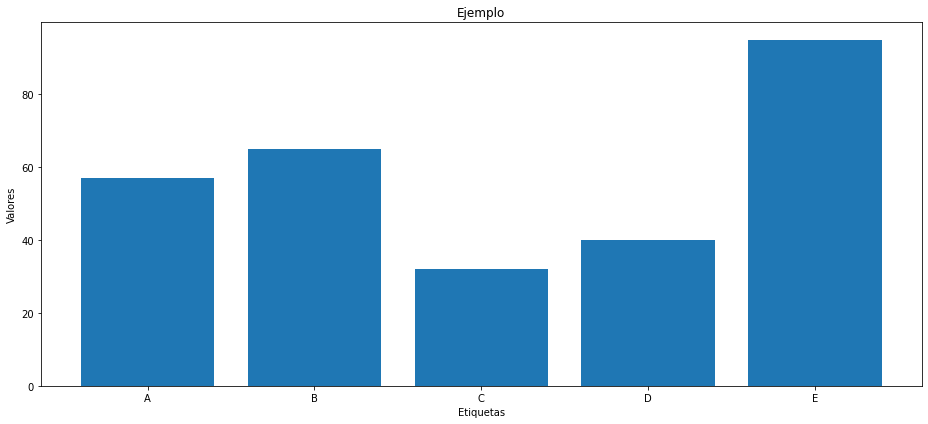

In [8]:
# veamos como pintarlos
plt.figure(figsize=(13, 6)) # tamaño del recuadro
plt.bar(x, y) # bar para pintar un gráfico de barras
plt.title("Ejemplo") # nuestro título
plt.xticks(x, etiquetas) # para pintar cada etiqueta en su posición
plt.xlabel("Etiquetas") # Nombre del eje X
plt.ylabel("Valores") # Nombre del eje Y
plt.tight_layout() # para ajustar el gráfico a la figura
plt.show()

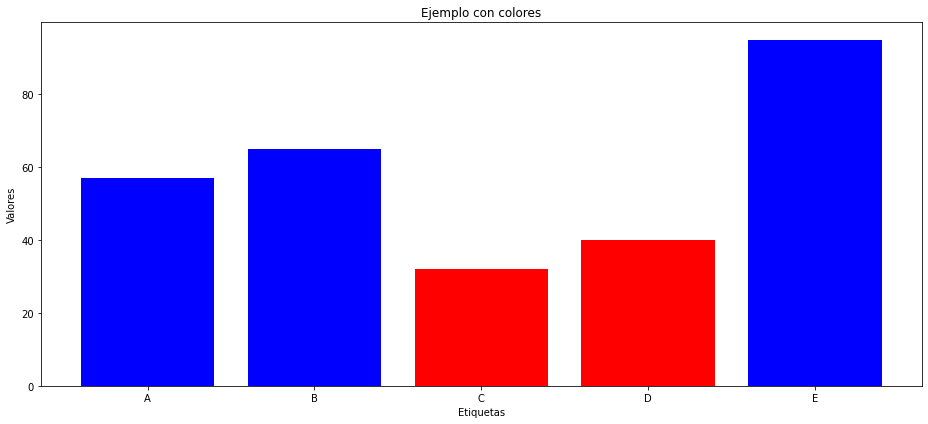

In [9]:
# de manera adicional, podemos especificar el color de cada barra generando una lista de colores

colores = ['red' if numero % 2 == 0 else 'blue' for numero in y] # rojo pares, azul impares

plt.figure(figsize=(13, 6))
plt.bar(x, y, color=colores) # añadimos la lista de colores para cada barra
plt.title("Ejemplo con colores")
plt.xticks(x, etiquetas) 
plt.xlabel("Etiquetas") 
plt.ylabel("Valores") 
plt.tight_layout()
plt.show()

Como vemos en el ejemplo anterior, en este caso no hemos añadir una leyenda porque no hemos indicar el color para cada plt.bar() si no para cada barra dentro del propio plt.bar().

Si deseáramos incluir una leyenda, tendríamos que hacer cada conjunto de elemtos (pares e impares) por separado.

No obstante, en este ejercicio, no es necesario añadir leyenda para el Extra, vale con cambiar los colores en función de lo indicado.

Eso es todo, a por el ejercicio!

## Solución

In [10]:
import requests

In [11]:
from datetime import datetime

In [12]:
from matplotlib import pyplot as plt

In [13]:
%matplotlib inline

In [14]:
data = requests.get("https://covid19.isciii.es/resources/serie_historica_acumulados.csv").text

In [15]:
registros = data.splitlines()

In [16]:
def registro_valido(registro):
    return len(registro.split(",")[0]) == 2

real_data = list(filter(registro_valido, registros))

In [17]:
def format_reg(reg):
    splitted = reg.split(",")
    reg_as_dict = {
        'ccaa': splitted[0],
        'date': datetime.strptime(splitted[1], '%d/%m/%Y'),
        'cases': int(splitted[2]) if splitted[2] else 0,
        'in_hospital': int(splitted[3]) if splitted[3] else 0,
        'in_UCI': int(splitted[4]) if splitted[4] else 0,
        'deaths': int(splitted[5]) if splitted[5] else 0,
        'recovered': int(splitted[6]) if splitted[6] else 0
    }
    return reg_as_dict

In [18]:
formatted_data = list(map(format_reg, real_data))

In [19]:
most_recent = formatted_data[-19:]

In [20]:
labels = [reg.get('ccaa') for reg in most_recent]

In [21]:
cases = [reg.get('cases') for reg in most_recent]

In [22]:
x = range(len(cases))

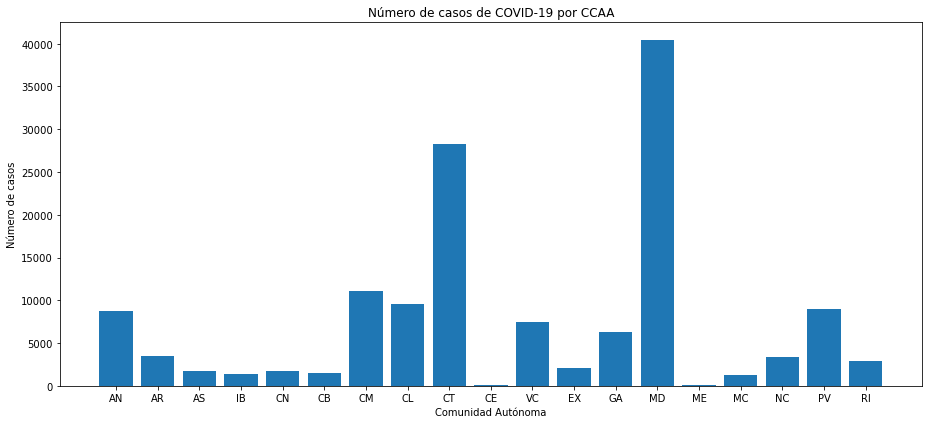

In [23]:
plt.figure(figsize=(13, 6))
plt.bar(x, cases)
plt.title("Número de casos de COVID-19 por CCAA")
plt.xticks(x, labels)
plt.xlabel("Comunidad Autónoma")
plt.ylabel("Número de casos")
plt.tight_layout()
plt.show()

In [24]:
def cases(reg):
    return reg.get('cases')

In [25]:
most_recent_sorted = list(sorted(most_recent, key=cases, reverse=True))

In [26]:
labels = [reg.get('ccaa') for reg in most_recent_sorted]
cases = [reg.get('cases') for reg in most_recent_sorted]
colors = ['red' if n_cases > 5000 else 'blue' for n_cases in cases]

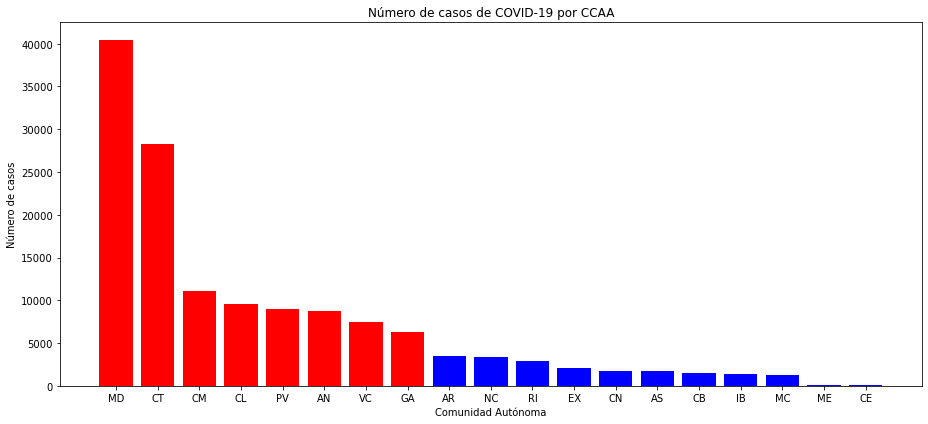

In [27]:
plt.figure(figsize=(13, 6))
plt.bar(x, cases, color=colors)
plt.title("Número de casos de COVID-19 por CCAA")
plt.xticks(x, labels)
plt.xlabel("Comunidad Autónoma")
plt.ylabel("Número de casos")
plt.tight_layout()
plt.show()